<a href="https://colab.research.google.com/github/kuldeep-lahkar/Project/blob/main/covid_disease_spread_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"

data = pd.read_csv(url)

data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
india = data[data['Country'] == 'India']

india.head()

,Date,Country,Confirmed,Recovered,Deaths
65280,2020-01-22,India,0,0,0
65281,2020-01-23,India,0,0,0
65282,2020-01-24,India,0,0,0
65283,2020-01-25,India,0,0,0
65284,2020-01-26,India,0,0,0


In [ ]:
india.shape

(816, 5)

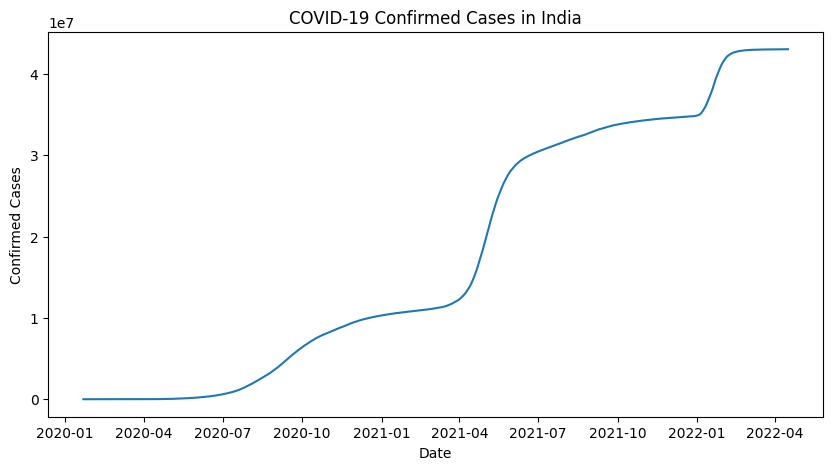

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(india['Date'], india['Confirmed'])
plt.title("COVID-19 Confirmed Cases in India")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

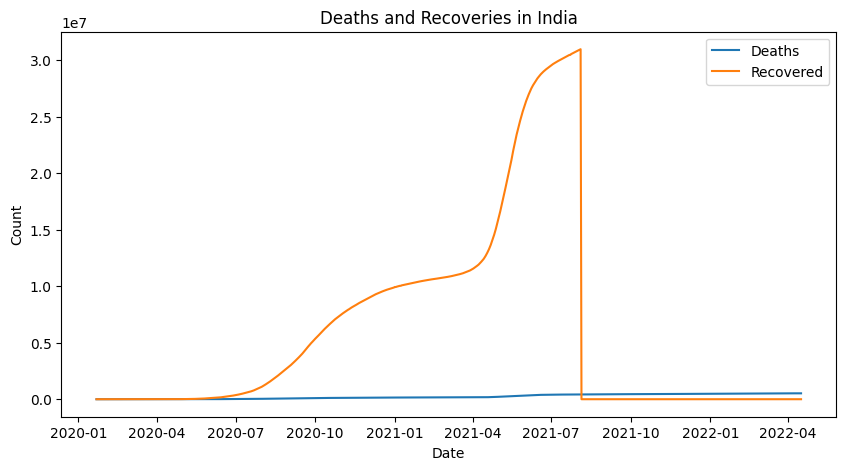

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(india['Date'], india['Deaths'], label="Deaths")
plt.plot(india['Date'], india['Recovered'], label="Recovered")
plt.legend()
plt.title("Deaths and Recoveries in India")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [ ]:
india = india.reset_index(drop=True)
india['Day'] = india.index

india.head()

,Date,Country,Confirmed,Recovered,Deaths,Day
0,2020-01-22,India,0,0,0,0
1,2020-01-23,India,0,0,0,1
2,2020-01-24,India,0,0,0,2
3,2020-01-25,India,0,0,0,3
4,2020-01-26,India,0,0,0,4


In [ ]:
X = india[['Day']]          # Input
y = india['Confirmed']     # Output

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predicted = model.predict(X_test)

In [ ]:
error = mean_absolute_error(y_test, predicted)
print("Mean Absolute Error:", error)

Mean Absolute Error: 3197298.6990979663


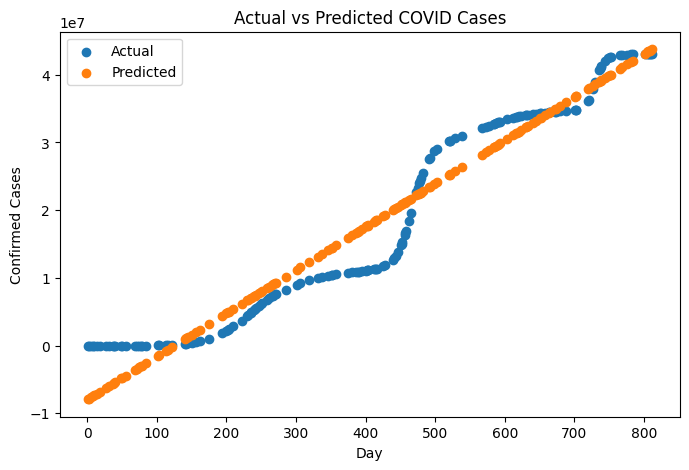

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, predicted, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted COVID Cases")
plt.xlabel("Day")
plt.ylabel("Confirmed Cases")
plt.show()

In [ ]:
future_days = np.array([[len(india) + i] for i in range(1, 11)])
future_prediction = model.predict(future_days)

for i in range(10):
    print(f"Day +{i+1}: {int(future_prediction[i])} cases")

Day +1: 44137830 cases
Day +2: 44201621 cases
Day +3: 44265413 cases
Day +4: 44329204 cases
Day +5: 44392995 cases
Day +6: 44456786 cases
Day +7: 44520577 cases
Day +8: 44584369 cases
Day +9: 44648160 cases
Day +10: 44711951 cases


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("""
Conclusion:
This project analyzes COVID-19 disease spread using real-world data.
Machine learning helps predict future confirmed cases.
Such analysis supports medical decision-making and pandemic planning.
""")


Conclusion:
This project analyzes COVID-19 disease spread using real-world data.
Machine learning helps predict future confirmed cases.
Such analysis supports medical decision-making and pandemic planning.

